# MACHINE LEARNING ASSIGNMENT
# Assignment 6:  Validation and Regularization
# Group Members: Francis Kwame Segbe and Anusha Reddy Singireddy


#Problem 1 (20 points)
One of the applications of validation set is to select appropriate model parameters. In k-fold method you’ll partition data into k (10 for this assignment)
randomly chosen subsets of equal size. One subset is used to validate the model
trained using the remaining subsets. This process is repeated k times such that
each subset is used exactly once for validation.
In this problem will use validation sets to pick parameters for k-nearestneighbor (KNN) model. The data sets for this problem are healthcareTrain.csv
and healthcareTest.csv.
Note that you can use the built-in function for KNN, but you need to write
your own code for cross-validation for this problem.



In [173]:
import pandas as pd
import random
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv

In [174]:
# Load the data
np.random.seed(42)
train_data = pd.read_csv('/content/healthcareTrain (1).csv')
test_data = pd.read_csv('/content/healthcareTest (1).csv')

1. (10 points) Create a KNN classifier model to predict the pdc-80-flag using
the following continuous features “total-los”,“num-op”,“num-er”,“numndc”,“pre-total-cost”, and “pre-CCI”. Use 10-fold cross validation to determine which value of K produces the most accurate result from the range
k = 31 to 101 with a step size of 2.


In [175]:
# Extract the target variable and the continuous features
target = "pdc_80_flag"
features = ["total_los", "num_op", "num_er", "num_ndc", "pre_total_cost", "pre_CCI"]

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Scaling both train and test set.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
# Define function to perform k-fold cross-validation and return mean accuracy score
def cross_val_knn(k):
    random.seed(42)
    accuracy_scores = []
    fold_size = X_train_scaled.shape[0] // 10
    
    # Shuffle indices
    indices = np.arange(X_train_scaled.shape[0])
    np.random.shuffle(indices)
    
    # Loop through 10 folds
    for i in range(10):
        start = i * fold_size
        end = (i+1) * fold_size
        
        # Define validation set for this fold
        val_indices = indices[start:end]
        X_val = X_train_scaled[val_indices]
        y_val = y_train[val_indices]
        
        # Define training set for this fold
        train_indices = np.concatenate([indices[:start], indices[end:]])
        X_train_fold = X_train_scaled[train_indices]
        y_train_fold = y_train[train_indices]
        
        # Train KNN model on training set and predict on validation set
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_val)
        
        # Calculate accuracy score for this fold
        accuracy = np.mean(y_pred == y_val)
        accuracy_scores.append(accuracy)
    
    # Return mean accuracy score across all folds
    return np.mean(accuracy_scores)

In [177]:
# Define range of k values to test
k_values = list(range(31, 102, 2))

# Create empty list to store mean accuracy scores for each k value
accuracy_scores = []

# Loop through k values and calculate mean accuracy score for each k
for k in k_values:
    accuracy_scores.append(cross_val_knn(k))

# Find k value with highest mean accuracy score
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("The best value of k is:", best_k)

The best value of k is: 33


In [178]:
# Compute the mean accuracy score using cross-validation for the best value of k
best_accuracy = cross_val_knn(best_k)

# Print the accuracy score
print("Accuracy score for k =", best_k, "is:", best_accuracy)

Accuracy score for k = 33 is: 0.6109489051094892


2. (5 points) Plot the accuracy rate from your 10-fold cross validation vs. K.

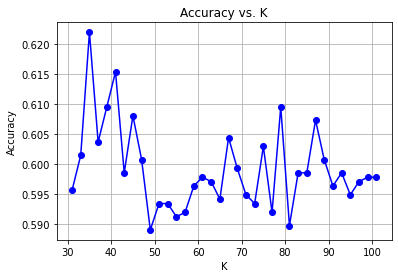

In [179]:
import matplotlib.pyplot as plt

# Define range of k values to test
k_values = list(range(31, 102, 2))

# Calculate mean accuracy score for each k value
accuracy_scores = [cross_val_knn(k) for k in k_values]

# Plot accuracy scores vs. k values
fig, ax = plt.subplots()
ax.plot(k_values, accuracy_scores, color='blue', linestyle='-', marker='o')
ax.set_xlabel('K')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs. K')
ax.grid(True)
plt.show()

3. (5 points) Use the best value of K to predict the pdc-80-flag for the test
set. How does your validation error compare to test error?


In [180]:
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Calculate validation error and test error
val_error = 1 - np.mean(accuracy_scores)
test_error = 1 - np.mean(y_pred == y_test)

print("Validation error:", val_error)
print("Test error:", test_error)

Validation error: 0.4007502027575023
Test error: 0.375


The validation error and test error 40% and 37% respectively. Considering a general rule of 1% difference. This can be interpreted as a significant difference.

# Problem 2 (20 points)
Consider a learning scenario where the goal is to learn the target function f(x) =
sin(πx) for −1 ≤ x ≤ +1 from two points in the training sets. The two training
points in R2 have a uniform distribution between -1 and +1. You will create two
models in linear hypothesis set y = mx + b: 1) unregularized, 2) weight-decay
regularized (use L2 regularization with λ = 0.1).

In [181]:
# Define the target function
def f(x):
    return np.sin(np.pi * x)

# Set random seed 
np.random.seed(42)

# Define the number of hypotheses to generate
num_hypotheses = 10000

# Generate random points for each hypothesis space
x1, x2 = np.random.uniform(-1, 1, size=(2, num_hypotheses))
y1, y2 = f(x1), f(x2)

# Calculating unregularized.
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1
avg_unreg1 = np.round(m.mean(), 3)
avg_unreg2 = np.round(b.mean(), 3)
print(f"av_unregularized:{avg_unreg1}")
print(f"av_unregularized:{avg_unreg2}")



av_unregularized:0.786
av_unregularized:-0.001


In [182]:
#Calculating for regularized
df_x = pd.DataFrame({'x1': x1, 'x2': x2})
df_y = pd.DataFrame({'y1': y1, 'y2': y2})
Ones = [1,1]
I = np.eye(2)
b_s = []
m_s = []
for i in range(len(x1)):
    X = np.vstack((Ones,df_x.loc[i,:])).T
    W = inv(X.T@X+0.1*I)@X.T@df_y.loc[i,:]
    b_s.append(W[0])
    m_s.append(W[1])
avg_reg_1 = np.round(np.mean(m_s),3)
avg_reg_2 = np.round(np.mean(b_s),3)
print(f"av_regularized: {avg_reg_1}")
print(f"av_regularized: {avg_reg_2}")

av_regularized: 0.627
av_regularized: -0.001


2. (5 points) Find and report bias2
for each mode

In [183]:
# Finding the bias^2 for unregularized version
x_range = np.linspace(-1, 1, 300000)
# Determine the values at x_range
f_xs= []

for x in x_range:
    f_x = f(x)
    f_xs.append(f_x)
    
def bar1(x):
    return avg_unreg1*x + avg_unreg2

bs1 = []
for x in x_range:
    gbar = bar1(x)
    bs1.append(gbar)

bias_sq = []
for i in range(len(bs1)):
    bias_sq.append((bs1[i] - f_xs[i])**2)
un_reg_bias_2 = sum(bias_sq)/(300000-1)

print("Unregularized bias^2:",np.round(un_reg_bias_2,3))

Unregularized bias^2: 0.206


In [184]:
# bias^2 for L2 regularization with lambda = 0.1
# calculate g_bars at x_range
def bar2(x):
    return avg_reg_1*x + avg_reg_2

bs2 = []
for x in x_range:
    gbar = bar2(x)
    bs2.append(gbar)

bias_sq = []
for i in range(len(bs2)):
    bias_sq.append((bs2[i] - f_xs[i])**2)
reg_bias_2 = sum(bias_sq)/(300000-1)

print("Regularized bias^2:",np.round(reg_bias_2,3))

Regularized bias^2: 0.232


3. (5 points) Find and report variance for each model

In [185]:
# Define the range of x values
x_range = np.linspace(-1, 1, 1000)

# Calculate the average value of g(x) over the range of x values
bs1 = np.array([bar1(x) for x in x_range])
gbar_mean_1 = np.mean(bs1)

# Calculate the variance of g(x) over the range of x values
variances_1 = []
for m_i, b_i in zip(m, b):
    ys = m_i * x_range + b_i
    vars_i = np.mean((ys - bs1) ** 2)
    variances_1.append(vars_i)
VAR_1 = round(np.mean(variances_1),3)

print(f"The variance of g(x) over the range [-1, 1] is {VAR_1:.3f}.")

The variance of g(x) over the range [-1, 1] is 1.667.


In [186]:

# Define the range of x values
x_range = np.linspace(-1, 1, 1000)

# Calculate the average value of g(x) over the range of x values
bs2 = np.array([bar2(x) for x in x_range])
gbar_mean_2 = np.mean(bs2)

# Calculate the variance of g(x) over the range of x values
variances_2 = []
for m_i, b_i in zip(m_s, b_s):
    ys = m_i * x_range + b_i
    vars_i = np.mean((ys - bs2) ** 2)
    variances_2.append(vars_i)
VAR_2 = np.mean(variances_2)

print(f"The variance of g(x) with regularization over the range [-1, 1] is {VAR_2:.3f}.")

The variance of g(x) with regularization over the range [-1, 1] is 0.330.


4. (5 Points) For each case, plot ¯g(x) ±
p
var(x) along with ¯g(x) and target
function f(x) = sin(πx) . Which model will you choose? Why? Round
your answers to 3 decimal places

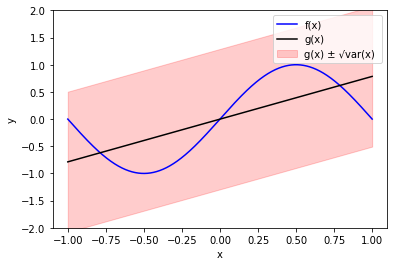

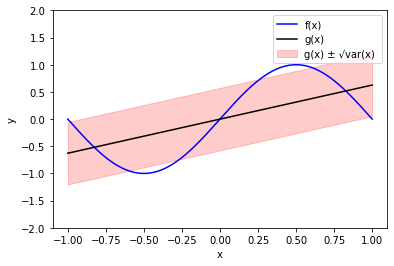

In [187]:
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(-1, 1, num=1000)

# Calculate the upper and lower bounds of the confidence interval
y1 = bs1 + np.sqrt(VAR_1)
y2 = bs1 - np.sqrt(VAR_1)

# Plot the true function f(x) in blue, the estimated function g(x) in black, and the confidence interval in red
plt.plot(x, f(x), color='blue', label='f(x)')
plt.plot(x, bs1, color='black', label='g(x)')
plt.fill_between(x, y1, y2, color='red', alpha=0.2, label='g(x) ± √var(x) ')
plt.legend()

# Set the x and y axis labels and limits
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2, 2)

# Show the plot
plt.show()



# Define the range of x values
x = np.linspace(-1, 1, num=1000)

# Calculate the upper and lower bounds of the confidence interval
y1 = bs2 + np.sqrt(VAR_2)
y2 = bs2 - np.sqrt(VAR_2)

# Plot the true function f(x) in blue, the estimated function g(x) in black, and the confidence interval in red
plt.plot(x, f(x), color='blue', label='f(x)')
plt.plot(x, bs2, color='black', label='g(x)')
plt.fill_between(x, y1, y2, color='red', alpha=0.2, label='g(x) ± √var(x) ')
plt.legend()

# Set the x and y axis labels and limits
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2, 2)

# Show the plot
plt.show()

Which model will you choose? Why? Round
your answers to 3 decimal places.
1

In [188]:
# Calculating MSE of Unregularized Hypothesis
un_reg_mse = round(un_reg_bias_2 + VAR_1,3)
un_reg_mse

1.873

In [189]:
reg_mse = round(reg_bias_2 + VAR_2,3)
reg_mse

0.562

Based on the calculations above I will choose regularizedhypothesis due to the fact that, its Mean Squared Error (MSE) is lower compared to unregularized hypothesis.